In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Lectura del archivo de Chicago sin valores nulos.

In [2]:
data = pd.read_csv("chicago_sin_valores_nulos.csv")
data

,Unnamed: 0,id,listing_url,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,2.384000e+03,https://www.airbnb.com/rooms/2384,2613,Rebecca,29/08/2008,Desconocido,within an hour,100.00%,88.00%,...,4.980000,4.950000,4.9400,R17000015609,f,1,0,1,0,2.080000
1,1,7.126000e+03,https://www.airbnb.com/rooms/7126,17928,Sarah,19/05/2009,"Chicago, IL",within an hour,100.00%,100.00%,...,4.870000,4.900000,4.7500,R24000114046,f,1,1,0,0,2.940000
2,2,1.094500e+04,https://www.airbnb.com/rooms/10945,33004,At Home Inn,21/08/2009,"Chicago, IL",within an hour,94.00%,95.00%,...,4.870000,4.980000,4.7200,2209984,t,5,5,0,0,0.820000
3,3,1.214000e+04,https://www.airbnb.com/rooms/12140,46734,Shay And Robert,18/10/2009,"Chicago, IL",within an hour,100.00%,75.00%,...,5.000000,5.000000,4.8100,R20000055258,f,1,0,1,0,0.140000
4,4,2.874900e+04,https://www.airbnb.com/rooms/28749,27506,Lauri,25/07/2009,Italy,within a few hours,100.00%,88.00%,...,4.860000,4.920000,4.7100,R24000113825,f,1,1,0,0,1.340000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8264,8264,1.246510e+18,https://www.airbnb.com/rooms/1246505616545117832,101370587,Valora Kendra,26/10/2016,"Cashton, WI",within an hour,100.00%,100.00%,...,4.858064,4.756297,4.6704,Sin licencia,t,1,1,0,0,1.964281
8265,8265,1.246520e+18,https://www.airbnb.com/rooms/1246520637932735784,62022982,Patricia,07/03/2016,"Chicago, IL",within an hour,100.00%,99.00%,...,4.858064,4.756297,4.6704,R24000120606,t,17,17,0,0,1.964281
8266,8266,1.246620e+18,https://www.airbnb.com/rooms/1246620570694363906,135843543,Vladimir,19/06/2017,"Chicago, IL",within a few hours,100.00%,86.00%,...,4.858064,4.756297,4.6704,Sin licencia,f,2,2,0,0,1.964281
8267,8267,1.246640e+18,https://www.airbnb.com/rooms/1246639379562163059,51767459,Eva,19/12/2015,"Chicago, IL",within an hour,100.00%,98.00%,...,4.858064,4.756297,4.6704,R23000108019,f,6,3,3,0,1.964281


Mostramos información de las variables

In [ ]:
data.info()

Tranformación de "price" , "host_response_rate" y "host_acceptance_rate" a tipo float

In [5]:
data["price"] = data["price"].replace('[\$,]', '', regex=True).astype(float)
data["host_response_rate"] = data["host_response_rate"].str.rstrip('%').astype(float)
data["host_acceptance_rate"] = data["host_acceptance_rate"].str.rstrip('%').astype(float)



<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\yack_\AppData\Local\Temp\ipykernel_16096\814569546.py:1: SyntaxWarning: invalid escape sequence '\$'
  data["price"] = data["price"].replace('[\$,]', '', regex=True).astype(float)


In [ ]:
data.info()

Variables cuantitativas y cualitativas

In [9]:
cualitativas = data.iloc[:, [2, 4, 5, 6, 7, 10, 12, 13, 14, 17, 18, 21, 24, 28, 29, 35, 36, 44, 45,]]
cuantitativas = data.iloc[:, [0,1, 3, 8, 9, 11, 15, 16, 19, 20, 22, 23, 25, 26, 27, 30, 31, 32, 33, 34, 37, 38, 39, 40, 41, 42, 43, 46, 47, 48, 49, 50]]

Diagrama de caja

<Figure size 1500x800 with 0 Axes>

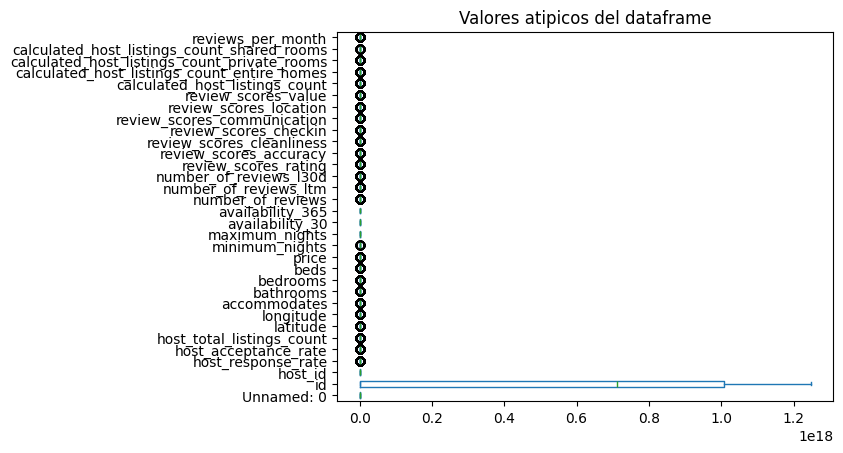

In [12]:
fig = plt.figure(figsize=(15, 8))
cuantitativas.plot(kind="box", vert=False)
plt.title("Valores atipicos del dataframe")
plt.show() 

Método de desviación estandar

In [13]:
y=cuantitativas
Limites_Superior = y.mean() + 3*y.std()
Limite_Inferior = y.mean() - 3*y.std()
print("Limite superior permitido", Limites_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido Unnamed: 0                                      1.129560e+04
id                                              2.017603e+18
host_id                                         7.778449e+08
host_response_rate                              1.398618e+02
host_acceptance_rate                            1.495910e+02
host_total_listings_count                       4.834798e+03
latitude                                        4.207957e+01
longitude                                      -8.753122e+01
accommodates                                    1.374830e+01
bathrooms                                       3.818214e+00
bedrooms                                        5.534361e+00
beds                                            7.740961e+00
price                                           1.067585e+03
minimum_nights                                  9.046295e+01
maximum_nights                                  1.765244e+03
availability_30                                 4.320839e+0

Datos de variables cuantitativas

In [14]:
data3=cuantitativas[(y<=Limites_Superior)&(y>=Limite_Inferior)]
data3

,Unnamed: 0,id,host_id,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,2.384000e+03,2613,100.0,88.0,1.0,41.787900,-87.587800,1.0,1.0,...,4.990000,4.990000,4.980000,4.950000,4.9400,1.0,0.0,1.0,0.0,2.080000
1,1,7.126000e+03,17928,100.0,100.0,2.0,41.901660,-87.680210,2.0,1.0,...,4.570000,4.910000,4.870000,4.900000,4.7500,1.0,1.0,0.0,0.0,2.940000
2,2,1.094500e+04,33004,94.0,95.0,86.0,41.911960,-87.639810,4.0,1.0,...,4.810000,4.840000,4.870000,4.980000,4.7200,5.0,5.0,0.0,0.0,0.820000
3,3,1.214000e+04,46734,100.0,75.0,1.0,41.923570,-87.649470,3.0,1.0,...,5.000000,5.000000,5.000000,5.000000,4.8100,1.0,0.0,1.0,0.0,0.140000
4,4,2.874900e+04,27506,100.0,88.0,7.0,41.921370,-87.679330,6.0,2.0,...,4.750000,4.930000,4.860000,4.920000,4.7100,1.0,1.0,0.0,0.0,1.340000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8264,8264,1.246510e+18,101370587,100.0,100.0,3.0,41.791659,-87.667216,5.0,1.0,...,4.758582,4.844255,4.858064,4.756297,4.6704,1.0,1.0,0.0,0.0,1.964281
8265,8265,1.246520e+18,62022982,100.0,99.0,18.0,41.864443,-87.625259,8.0,2.0,...,4.758582,4.844255,4.858064,4.756297,4.6704,17.0,17.0,0.0,0.0,1.964281
8266,8266,1.246620e+18,135843543,100.0,86.0,2.0,41.971151,-87.674107,5.0,2.0,...,4.758582,4.844255,4.858064,4.756297,4.6704,2.0,2.0,0.0,0.0,1.964281
8267,8267,1.246640e+18,51767459,100.0,98.0,8.0,41.944385,-87.687886,4.0,1.0,...,4.758582,4.844255,4.858064,4.756297,4.6704,6.0,3.0,3.0,0.0,1.964281


Corroboramos valores nulos

In [15]:
valores_nulos=data3.isnull().sum()
valores_nulos

Unnamed: 0                                        0
id                                                0
host_id                                           0
host_response_rate                              216
host_acceptance_rate                            305
host_total_listings_count                       193
latitude                                         57
longitude                                        75
accommodates                                    236
bathrooms                                       154
bedrooms                                        124
beds                                            191
price                                            88
minimum_nights                                   46
maximum_nights                                    0
availability_30                                   0
availability_365                                  0
number_of_reviews                               193
number_of_reviews_ltm                            73
number_of_re

Reemplazamos los valores atípicos

In [16]:
data_clean=data3.copy()
data_clean=data_clean.fillna(round(data3.mean(),1))
data_clean

,Unnamed: 0,id,host_id,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,2.384000e+03,2613,100.0,88.0,1.0,41.787900,-87.587800,1.0,1.0,...,4.990000,4.990000,4.980000,4.950000,4.9400,1.0,0.0,1.0,0.0,2.080000
1,1,7.126000e+03,17928,100.0,100.0,2.0,41.901660,-87.680210,2.0,1.0,...,4.570000,4.910000,4.870000,4.900000,4.7500,1.0,1.0,0.0,0.0,2.940000
2,2,1.094500e+04,33004,94.0,95.0,86.0,41.911960,-87.639810,4.0,1.0,...,4.810000,4.840000,4.870000,4.980000,4.7200,5.0,5.0,0.0,0.0,0.820000
3,3,1.214000e+04,46734,100.0,75.0,1.0,41.923570,-87.649470,3.0,1.0,...,5.000000,5.000000,5.000000,5.000000,4.8100,1.0,0.0,1.0,0.0,0.140000
4,4,2.874900e+04,27506,100.0,88.0,7.0,41.921370,-87.679330,6.0,2.0,...,4.750000,4.930000,4.860000,4.920000,4.7100,1.0,1.0,0.0,0.0,1.340000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8264,8264,1.246510e+18,101370587,100.0,100.0,3.0,41.791659,-87.667216,5.0,1.0,...,4.758582,4.844255,4.858064,4.756297,4.6704,1.0,1.0,0.0,0.0,1.964281
8265,8265,1.246520e+18,62022982,100.0,99.0,18.0,41.864443,-87.625259,8.0,2.0,...,4.758582,4.844255,4.858064,4.756297,4.6704,17.0,17.0,0.0,0.0,1.964281
8266,8266,1.246620e+18,135843543,100.0,86.0,2.0,41.971151,-87.674107,5.0,2.0,...,4.758582,4.844255,4.858064,4.756297,4.6704,2.0,2.0,0.0,0.0,1.964281
8267,8267,1.246640e+18,51767459,100.0,98.0,8.0,41.944385,-87.687886,4.0,1.0,...,4.758582,4.844255,4.858064,4.756297,4.6704,6.0,3.0,3.0,0.0,1.964281


Nuevamente corroboramos que no haya valores nulos

In [17]:
valores_nulos=data_clean.isnull().sum()
valores_nulos

Unnamed: 0                                      0
id                                              0
host_id                                         0
host_response_rate                              0
host_acceptance_rate                            0
host_total_listings_count                       0
latitude                                        0
longitude                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
availability_30                                 0
availability_365                                0
number_of_reviews                               0
number_of_reviews_ltm                           0
number_of_reviews_l30d                          0


Muestra de diagrama de caja

<Figure size 1500x800 with 0 Axes>

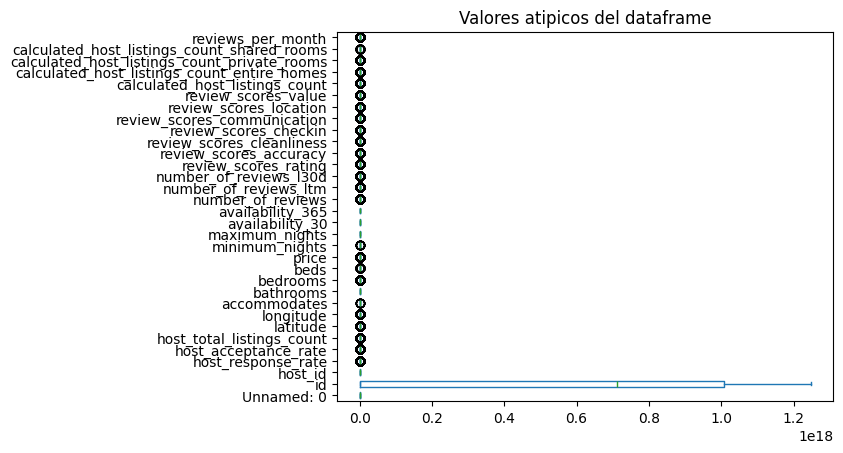

In [21]:
fig = plt.figure(figsize=(15, 8))
data_clean.plot(kind="box", vert=False)
plt.title("Valores atipicos del dataframe")
plt.show()

Procedimiento por cuartiles

In [22]:
y=cuantitativas

percentiles25=y.quantile(0.25) #Q1
percentiles75=y.quantile(0.75) #Q3
iqr = percentiles75 - percentiles25

Limite_Superior_iqr = percentiles75 + 1.5*iqr
Limite_Inferior_iqr = percentiles25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido Unnamed: 0                                      1.240200e+04
id                                              2.522050e+18
host_id                                         9.246933e+08
host_response_rate                              1.000000e+02
host_acceptance_rate                            1.155400e+02
host_total_listings_count                       6.950000e+01
latitude                                        4.204370e+01
longitude                                      -8.754855e+01
accommodates                                    1.200000e+01
bathrooms                                       3.500000e+00
bedrooms                                        3.500000e+00
beds                                            6.000000e+00
price                                           4.235000e+02
minimum_nights                                  7.700000e+01
maximum_nights                                  2.632500e+03
availability_30                                 4.650000e+0

Obtenemos datos

In [23]:
data3_iqr = cuantitativas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

,Unnamed: 0,id,host_id,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,2.384000e+03,2613,100.0,88.0,1.0,41.787900,-87.587800,1.0,1.0,...,4.990000,4.990000,4.980000,4.950000,4.9400,1.0,0.0,1.0,0.0,2.080000
1,1,7.126000e+03,17928,100.0,100.0,2.0,41.901660,-87.680210,2.0,1.0,...,4.570000,4.910000,4.870000,4.900000,4.7500,1.0,1.0,0.0,0.0,2.940000
2,2,1.094500e+04,33004,NaN,95.0,NaN,41.911960,-87.639810,4.0,1.0,...,4.810000,4.840000,4.870000,4.980000,4.7200,5.0,5.0,0.0,0.0,0.820000
3,3,1.214000e+04,46734,100.0,75.0,1.0,41.923570,-87.649470,3.0,1.0,...,5.000000,5.000000,5.000000,5.000000,4.8100,1.0,0.0,1.0,0.0,0.140000
4,4,2.874900e+04,27506,100.0,88.0,7.0,41.921370,-87.679330,6.0,2.0,...,4.750000,4.930000,4.860000,4.920000,4.7100,1.0,1.0,0.0,0.0,1.340000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8264,8264,1.246510e+18,101370587,100.0,100.0,3.0,41.791659,-87.667216,5.0,1.0,...,4.758582,4.844255,4.858064,4.756297,4.6704,1.0,1.0,0.0,0.0,1.964281
8265,8265,1.246520e+18,62022982,100.0,99.0,18.0,41.864443,-87.625259,8.0,2.0,...,4.758582,4.844255,4.858064,4.756297,4.6704,17.0,17.0,0.0,0.0,1.964281
8266,8266,1.246620e+18,135843543,100.0,86.0,2.0,41.971151,-87.674107,5.0,2.0,...,4.758582,4.844255,4.858064,4.756297,4.6704,2.0,2.0,0.0,0.0,1.964281
8267,8267,1.246640e+18,51767459,100.0,98.0,8.0,41.944385,-87.687886,4.0,1.0,...,4.758582,4.844255,4.858064,4.756297,4.6704,6.0,3.0,NaN,0.0,1.964281


Corroboramos valores nulos

In [24]:
valores_nulos = data3_iqr.isnull().sum()
valores_nulos

Unnamed: 0                                         0
id                                                 0
host_id                                            0
host_response_rate                              1843
host_acceptance_rate                             934
host_total_listings_count                       1246
latitude                                         263
longitude                                        253
accommodates                                     245
bathrooms                                        154
bedrooms                                         687
beds                                             277
price                                            692
minimum_nights                                    61
maximum_nights                                     0
availability_30                                    0
availability_365                                   0
number_of_reviews                                697
number_of_reviews_ltm                         

Reemplazamos valores atípicos

In [25]:
data4_iqr = data3_iqr.copy()
data4_iqr = data4_iqr.fillna(round(data3_iqr.mean(),1))
data4_iqr

,Unnamed: 0,id,host_id,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,2.384000e+03,2613,100.0,88.0,1.0,41.787900,-87.587800,1.0,1.0,...,4.990000,4.990000,4.980000,4.950000,4.9400,1.0,0.0,1.0,0.0,2.080000
1,1,7.126000e+03,17928,100.0,100.0,2.0,41.901660,-87.680210,2.0,1.0,...,4.570000,4.910000,4.870000,4.900000,4.7500,1.0,1.0,0.0,0.0,2.940000
2,2,1.094500e+04,33004,100.0,95.0,11.1,41.911960,-87.639810,4.0,1.0,...,4.810000,4.840000,4.870000,4.980000,4.7200,5.0,5.0,0.0,0.0,0.820000
3,3,1.214000e+04,46734,100.0,75.0,1.0,41.923570,-87.649470,3.0,1.0,...,5.000000,5.000000,5.000000,5.000000,4.8100,1.0,0.0,1.0,0.0,0.140000
4,4,2.874900e+04,27506,100.0,88.0,7.0,41.921370,-87.679330,6.0,2.0,...,4.750000,4.930000,4.860000,4.920000,4.7100,1.0,1.0,0.0,0.0,1.340000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8264,8264,1.246510e+18,101370587,100.0,100.0,3.0,41.791659,-87.667216,5.0,1.0,...,4.758582,4.844255,4.858064,4.756297,4.6704,1.0,1.0,0.0,0.0,1.964281
8265,8265,1.246520e+18,62022982,100.0,99.0,18.0,41.864443,-87.625259,8.0,2.0,...,4.758582,4.844255,4.858064,4.756297,4.6704,17.0,17.0,0.0,0.0,1.964281
8266,8266,1.246620e+18,135843543,100.0,86.0,2.0,41.971151,-87.674107,5.0,2.0,...,4.758582,4.844255,4.858064,4.756297,4.6704,2.0,2.0,0.0,0.0,1.964281
8267,8267,1.246640e+18,51767459,100.0,98.0,8.0,41.944385,-87.687886,4.0,1.0,...,4.758582,4.844255,4.858064,4.756297,4.6704,6.0,3.0,0.2,0.0,1.964281


Muestra de diagrama de caja

<Figure size 1500x800 with 0 Axes>

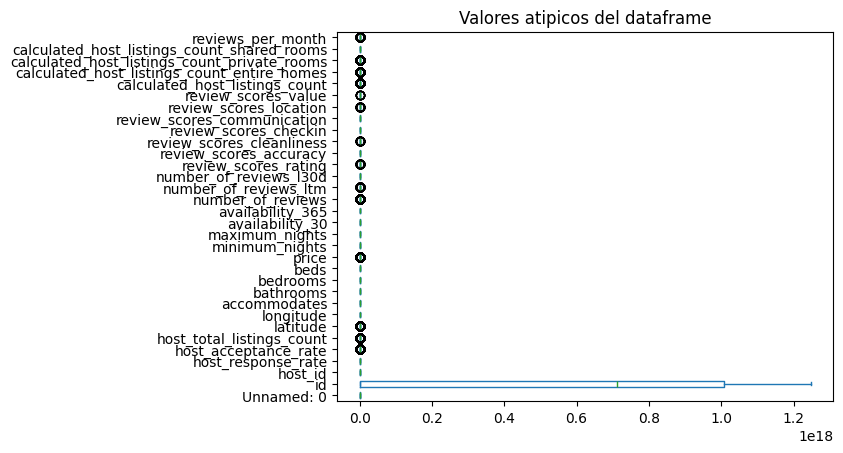

In [27]:
fig = plt.figure(figsize=(15, 8))
data4_iqr.plot(kind="box", vert=False)
plt.title("Valores atipicos del dataframe")
plt.show()

Unimos el dataframe de variables cualitativas limpias y cuantitativas

In [26]:
Datos_limpios = pd.concat([cualitativas, data4_iqr], axis=1)
Datos_limpios

,listing_url,host_name,host_since,host_location,host_response_time,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,property_type,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/2384,Rebecca,29/08/2008,Desconocido,within an hour,t,"['email', 'phone']",t,t,Private room in condo,...,4.990000,4.990000,4.980000,4.950000,4.9400,1.0,0.0,1.0,0.0,2.080000
1,https://www.airbnb.com/rooms/7126,Sarah,19/05/2009,"Chicago, IL",within an hour,t,"['email', 'phone']",t,t,Entire rental unit,...,4.570000,4.910000,4.870000,4.900000,4.7500,1.0,1.0,0.0,0.0,2.940000
2,https://www.airbnb.com/rooms/10945,At Home Inn,21/08/2009,"Chicago, IL",within an hour,t,"['email', 'phone', 'work_email']",t,t,Entire rental unit,...,4.810000,4.840000,4.870000,4.980000,4.7200,5.0,5.0,0.0,0.0,0.820000
3,https://www.airbnb.com/rooms/12140,Shay And Robert,18/10/2009,"Chicago, IL",within an hour,f,"['email', 'phone']",t,t,Room in boutique hotel,...,5.000000,5.000000,5.000000,5.000000,4.8100,1.0,0.0,1.0,0.0,0.140000
4,https://www.airbnb.com/rooms/28749,Lauri,25/07/2009,Italy,within a few hours,t,"['email', 'phone']",t,t,Entire loft,...,4.750000,4.930000,4.860000,4.920000,4.7100,1.0,1.0,0.0,0.0,1.340000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8264,https://www.airbnb.com/rooms/1246505616545117832,Valora Kendra,26/10/2016,"Cashton, WI",within an hour,t,"['email', 'phone']",t,t,Entire rental unit,...,4.758582,4.844255,4.858064,4.756297,4.6704,1.0,1.0,0.0,0.0,1.964281
8265,https://www.airbnb.com/rooms/1246520637932735784,Patricia,07/03/2016,"Chicago, IL",within an hour,t,"['email', 'phone']",t,t,Entire rental unit,...,4.758582,4.844255,4.858064,4.756297,4.6704,17.0,17.0,0.0,0.0,1.964281
8266,https://www.airbnb.com/rooms/1246620570694363906,Vladimir,19/06/2017,"Chicago, IL",within a few hours,t,"['email', 'phone']",t,t,Entire rental unit,...,4.758582,4.844255,4.858064,4.756297,4.6704,2.0,2.0,0.0,0.0,1.964281
8267,https://www.airbnb.com/rooms/1246639379562163059,Eva,19/12/2015,"Chicago, IL",within an hour,t,"['email', 'phone']",t,t,Private room in condo,...,4.758582,4.844255,4.858064,4.756297,4.6704,6.0,3.0,0.2,0.0,1.964281


In [29]:
Datos_limpios.to_csv("Datos_limpios_chicago.csv")